Source:
The Titanic dataset is available on Kaggle and is a classic dataset used for analysis and machine learning.

Features:

passengerId: Unique identifier for each passenger.
survived: Survival flag (0 = did not survive, 1 = survived).
pclass: Cabin class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
name: Name of the passenger.
sex: Gender of the passenger (male/female).
age: Age of the passenger.
sibSp: Number of siblings/spouses aboard.
parch: Number of parents/children aboard.
ticket: Ticket number.
fare: Ticket fare.
cabin: Cabin number.
embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the Titanic dataset from a local file
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
# Display the first few rows to check if the dataset is loaded correctly
print(df.head())

   passengerId  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
# Check for missing values in the dataset
print("Missing values in the data:")
print(df.isnull().sum())

Missing values in the data:
passengerId      0
survived         0
pclass           0
name             0
sex              0
age            177
sibSp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


In [6]:
# Fill missing values in the 'age' column with the median value
df['age'] = df['age'].fillna(df['age'].median())

In [7]:
# Fill missing values in the 'embarked' column with the most frequent value (mode)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [8]:
# Drop the 'cabin' column as it has too many missing values
df.drop(['cabin'], axis=1, inplace=True)


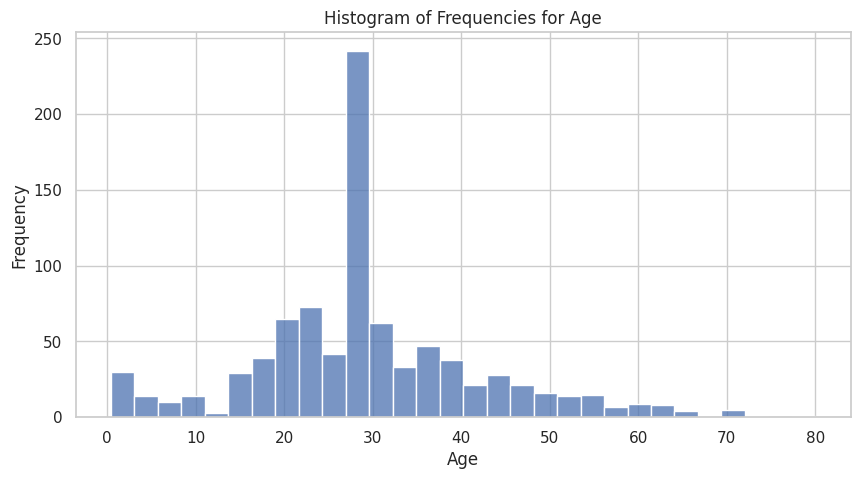

In [19]:
# Plot the age distribution of passengers
plt.figure(figsize=(10, 5))
sns.histplot(df['age'].dropna(), bins=30, kde=False)
plt.title('Histogram of Frequencies for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram shows the age distribution of passengers. It can be seen that most of the passengers are between the ages of 20 and 40.

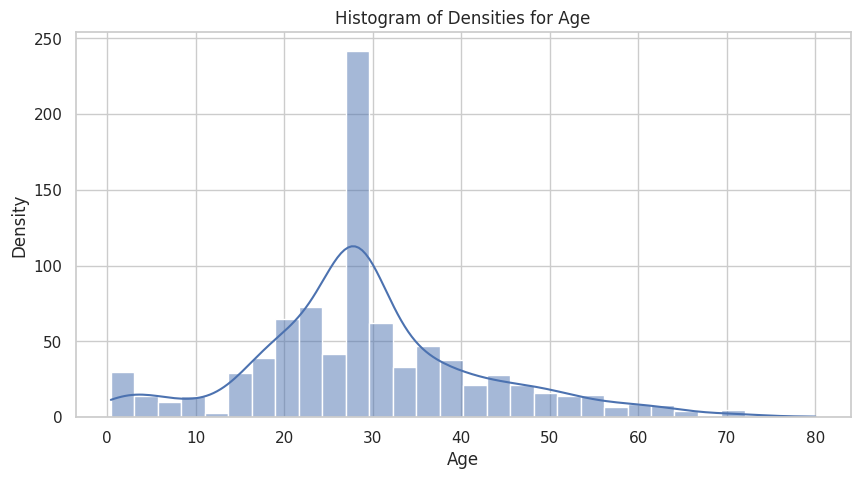

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title('Histogram of Densities for Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

The density histogram provides a smoothed view of the age distribution. It confirms that most passengers were concentrated around the 20-30 age range, suggesting a relatively young demographic on board the Titanic.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


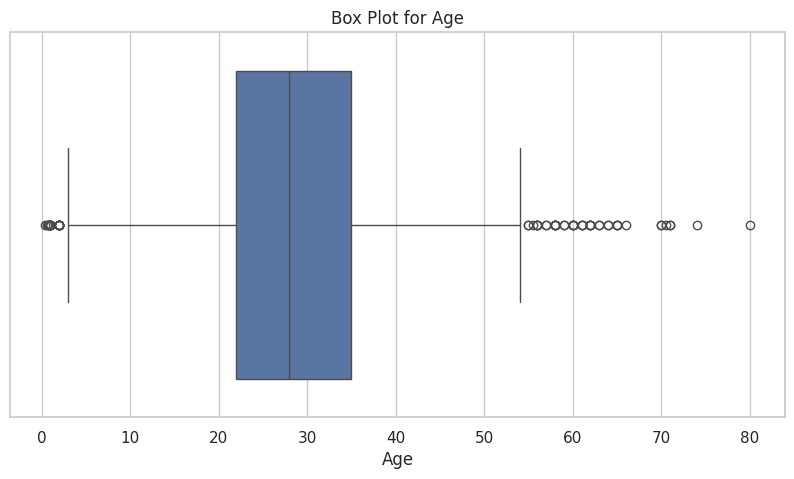

In [21]:
# Box plot for 'age'
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['age'])
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.show()

The box plot indicates the presence of outliers in the age distribution. While the median age is around 28 years, the whiskers extend significantly, showing that there are several passengers significantly older than the median. This information can be important when analyzing survival rates.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


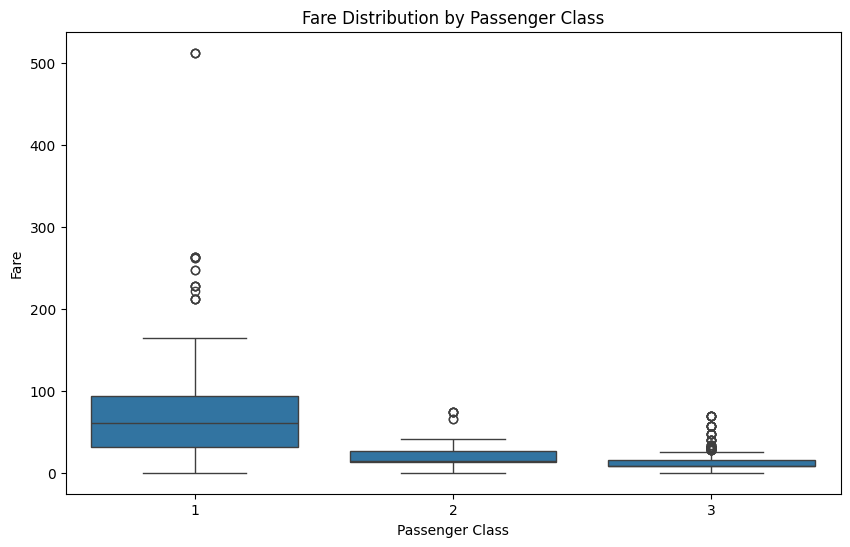

In [10]:
# Box plot to visualize fare distribution by passenger class
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

The cost of tickets varies greatly, most passengers have paid less than 50 units.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


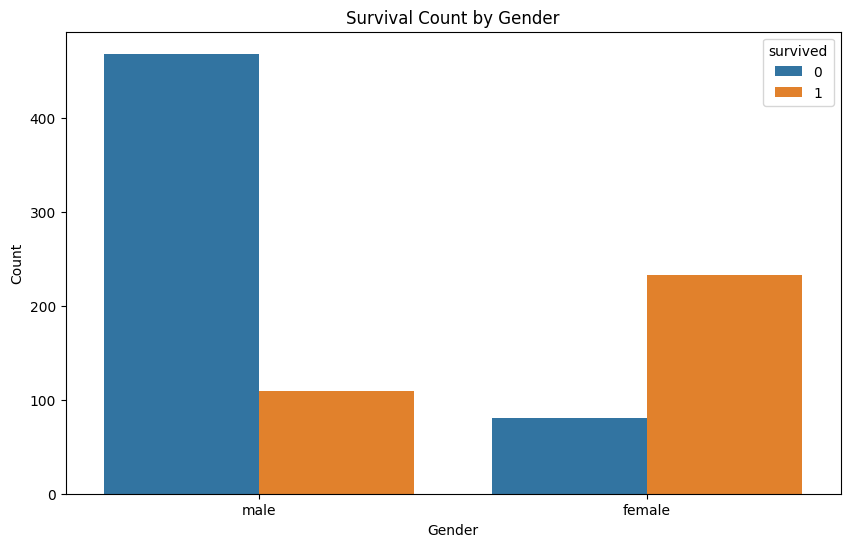

In [11]:
# Bar chart of survival counts by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The bar chart visualizes the survival counts separated by gender. It highlights the higher survival rate for females compared to males.

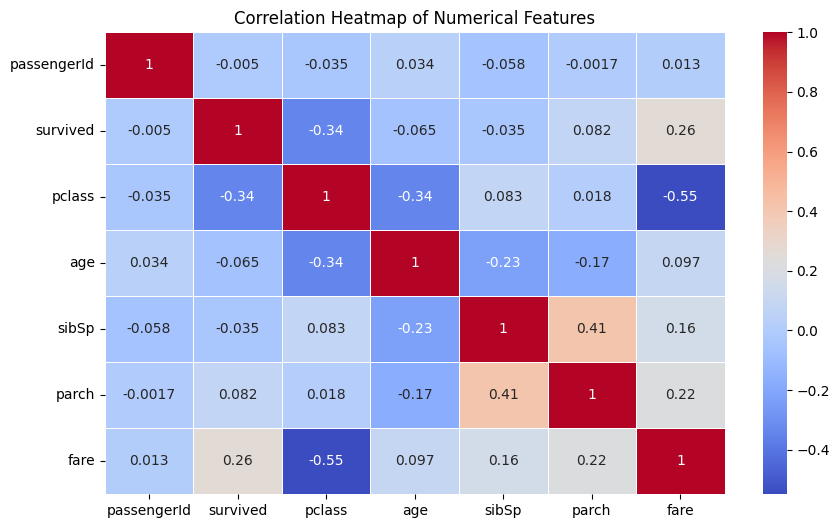

In [12]:
# Filter numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=[np.number])

# Correlation heatmap of numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The correlation matrix shows the relationship between numeric variables. It can be seen that 'fare' and 'pclass' are practically uncorrelated, while 'parch' and 'sibSp' have a weak positive correlation.

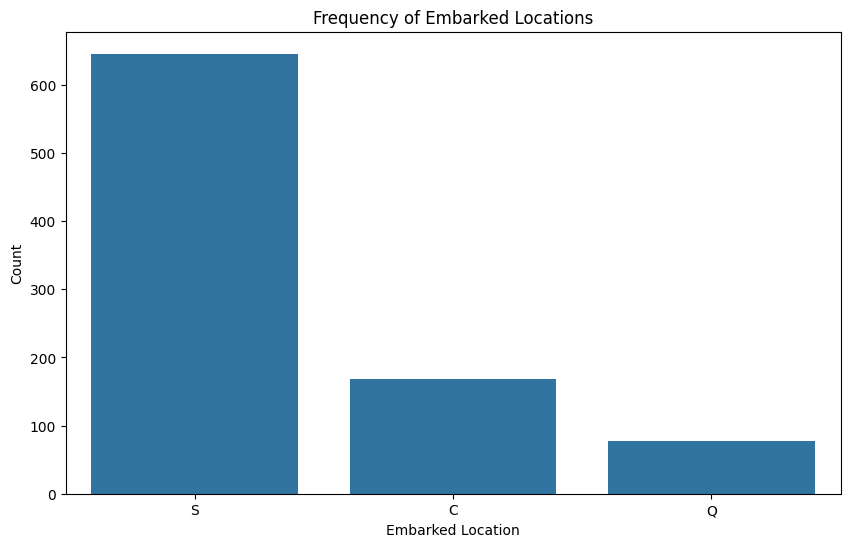

In [13]:
# Bar plot of embarked location frequencies
plt.figure(figsize=(10, 6))
sns.countplot(x='embarked', data=df)
plt.title('Frequency of Embarked Locations')
plt.xlabel('Embarked Location')
plt.ylabel('Count')
plt.show()

The bar plot shows the distribution of passengers across the embarkation points (Cherbourg, Queenstown, Southampton).

In [14]:
# Visualization parameters
sns.set(style="whitegrid")

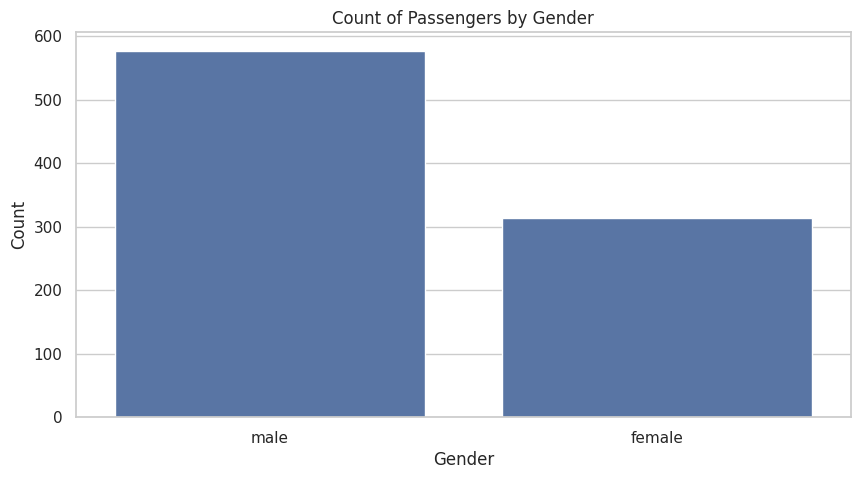

In [15]:
# Bar chart for gender
plt.figure(figsize=(10, 5))
sns.countplot(x='sex', data=df)
plt.title('Count of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The bar chart illustrates the distribution of passengers based on gender. It shows that there were significantly more male passengers compared to female passengers on the Titanic.

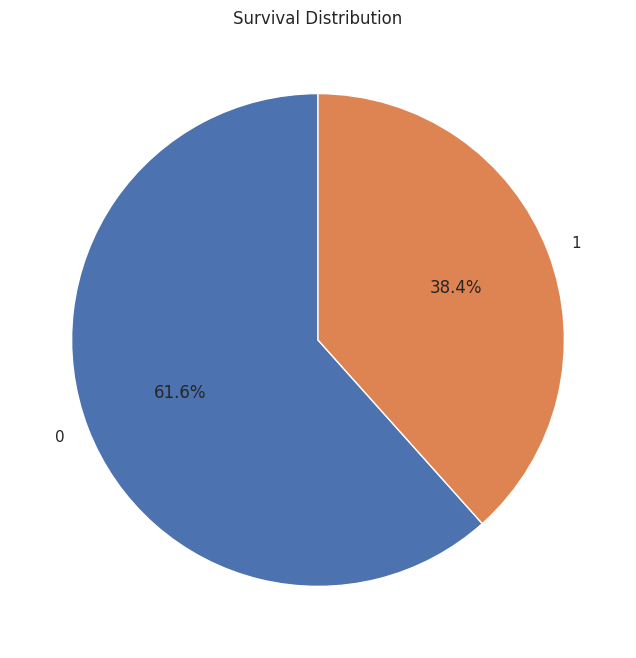

In [16]:
# Pie chart for survival
plt.figure(figsize=(8, 8))
df['survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')
plt.ylabel('')  # Hide ylabel
plt.show()

The pie chart depicts the survival distribution among the passengers. A notable proportion of passengers did not survive, while a smaller percentage did.

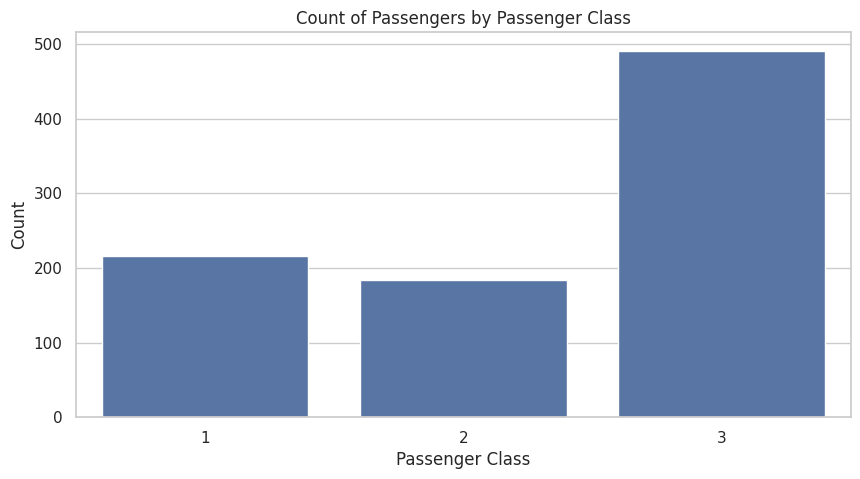

In [17]:
# Bar chart for passenger class
plt.figure(figsize=(10, 5))
sns.countplot(x='pclass', data=df)
plt.title('Count of Passengers by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

The bar chart demonstrates the number of passengers across the three classes (1st, 2nd, and 3rd). The majority of passengers were in the 3rd class, followed by the 1st class, and the least in the 2nd class.

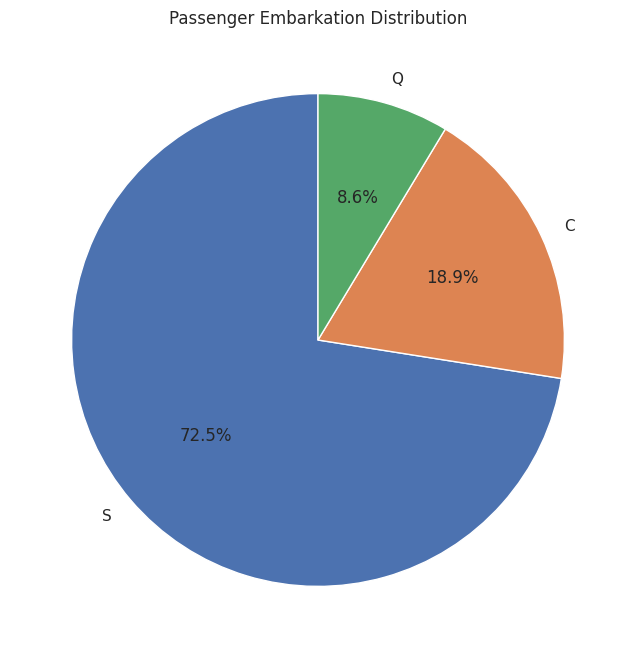

In [18]:
# Pie chart for port of embarkation
plt.figure(figsize=(8, 8))
df['embarked'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Passenger Embarkation Distribution')
plt.ylabel('')  # Hide ylabel
plt.show()

The pie chart shows the distribution of passengers based on their port of embarkation. Most passengers boarded the Titanic at Southampton, followed by Cherbourg and then Queenstown.

In [28]:
# Choose two categorical variables: 'pclass' and 'sex'
grouped_counts = df.groupby(['pclass', 'sex']).size().unstack()

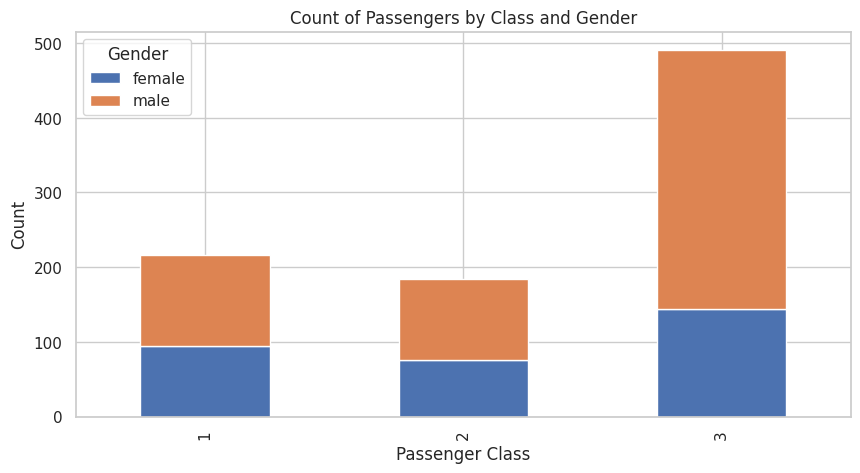

In [29]:
# Bar chart for grouped absolute frequencies
grouped_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Count of Passengers by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

The grouped bar chart illustrates the number of passengers by class and gender. It is evident that 1st class had more females than males, while 3rd class had a significant number of males. This distribution may reflect social dynamics and priorities during the evacuation, potentially impacting survival rates.

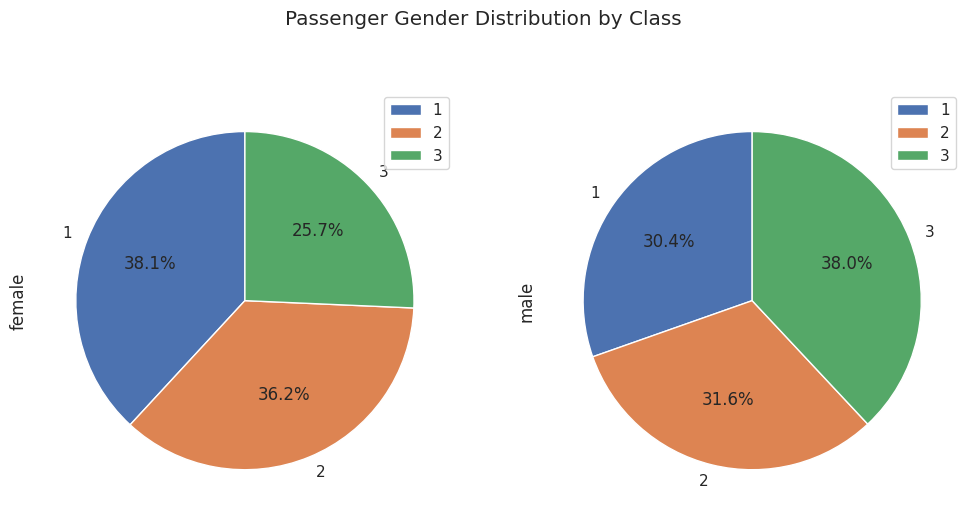

In [30]:
# Pie chart for grouped relative frequencies
grouped_counts_normalized = grouped_counts.div(grouped_counts.sum(axis=1), axis=0)
grouped_counts_normalized.plot(kind='pie', subplots=True, figsize=(12, 6), autopct='%1.1f%%', startangle=90)
plt.suptitle('Passenger Gender Distribution by Class')
plt.show()

The pie charts show the gender distribution within each class. In 1st class, females had a higher proportion, while in 3rd class, males were more prevalent. This distribution may have influenced survival outcomes, indicating that higher-class women had better chances of survival.